# *Assignment #7*
## **[CSCI 581](https://www.ecst.csuchico.edu/~bjuliano/csci581/)**, Fall 2021

Your name goes here

# Finding clusters in the Iris dataset

You will be treating the [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html), available from Scikit-learn, as unlabeled data to perform clustering via the [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) estimator.

## Overview

Scikit-learn's [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) is labeled data that we have used in supervised learning. To use it as unlabeled data for unsupervised learning, you will need to drop the last column from the training set before running the `fit()` method on an instance of the [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) estimator.

## Instructions

1.   Since we already know there are three varieties of Irises embodied in the [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html), use the whole unlabeled dataset with $k=3$ on an instance of the [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) estimator. Evaluate the performance of the model using as many metrics as you deem appropriate.
2.   Confirm if $k=3$ is the optimum value for $k$ on the unlabeled version of the [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Use the Silhouette Coefficient as a metric similar to the examples shown in our [PML 10 jupyter notebook](https://colab.research.google.com/gist/bjuliano/ad20bea98c646a2ccd522b4a91a70783/pml-10-unsupervised-learning-clustering-using-k-means.ipynb).
3. Summarize all your findings and present your conclusions regarding the use of this algorithm on the [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html).




## Required components of your submission 

Your *Google Colab* Jupyter notebook must include:

1.   all pertinent *exploratory data analysis* (EDA) code, visualizations, and justifications (you can reuse, perhaps with minimal modification, the work you did in your earlier Assignments);
2.   explanations/justifications for all model selection decisions;
3.   all pertinent model diagnostics, including metrics and visualizations; and
4.   your summary and conclusions pertaining to how the two models compare against each other.

Be sure to check out or review the *Assignments/Projects* section of our [*Blackboard*](https://learn.csuchico.edu/) course page for details regarding expectations, requirements, and the [*Jupyter Notebook Rubric*](https://www.ecst.csuchico.edu/~bjuliano/Teaching/rubric-jupyter-notebook.pdf) that will be used to evaluate Jupyter notebook submissions.



# Solution

In [1]:
''' all required imports '''
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import seaborn as sns; sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

## load dataset

In [2]:
iris = sns.load_dataset("iris")

## Expolratory Data Analysis and preprocessing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Dataset info:
 None 


Dataset describtion:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.90000

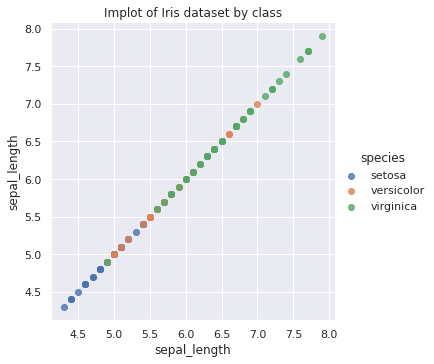

<Figure size 432x288 with 0 Axes>

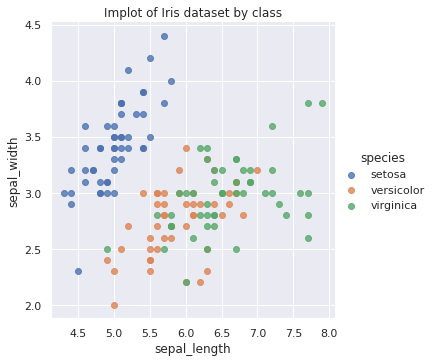

<Figure size 432x288 with 0 Axes>

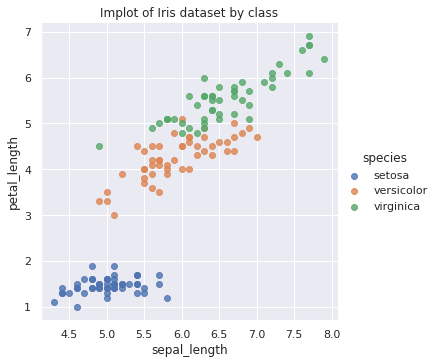

<Figure size 432x288 with 0 Axes>

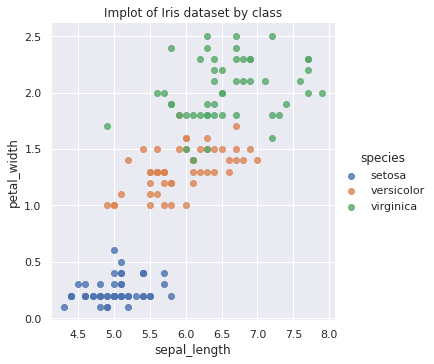

<Figure size 432x288 with 0 Axes>

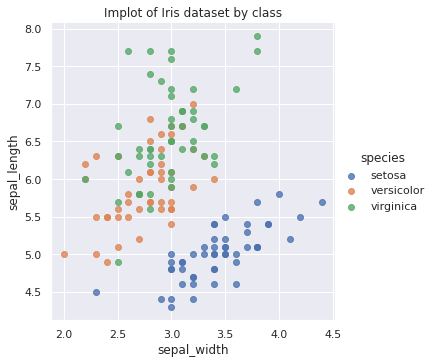

<Figure size 432x288 with 0 Axes>

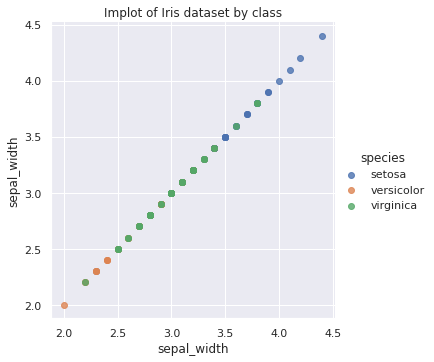

<Figure size 432x288 with 0 Axes>

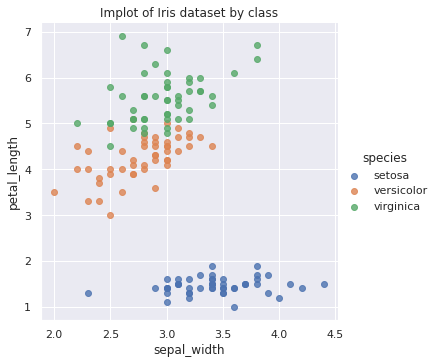

<Figure size 432x288 with 0 Axes>

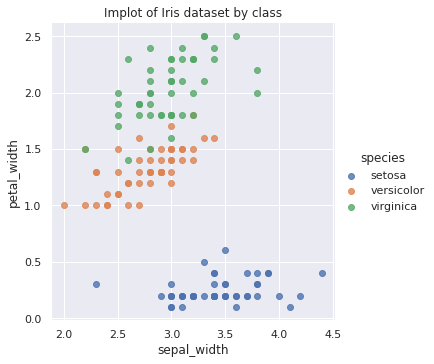

<Figure size 432x288 with 0 Axes>

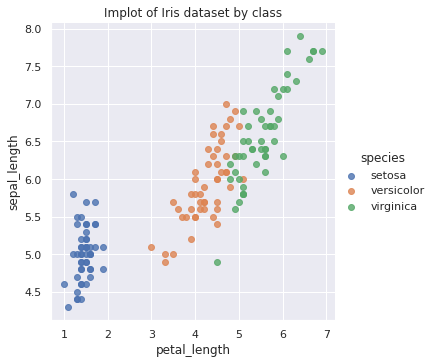

<Figure size 432x288 with 0 Axes>

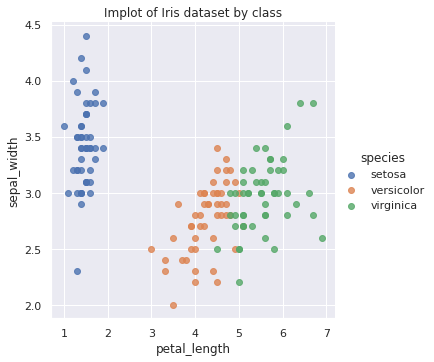

<Figure size 432x288 with 0 Axes>

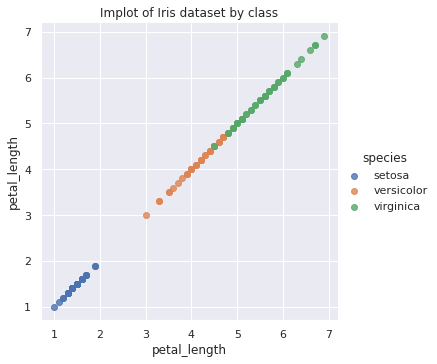

<Figure size 432x288 with 0 Axes>

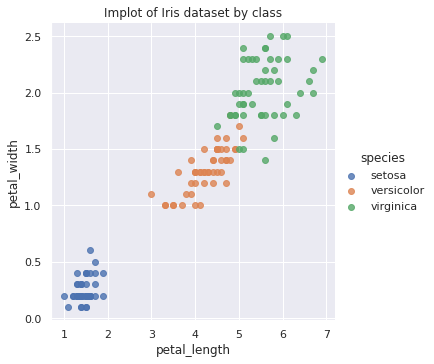

<Figure size 432x288 with 0 Axes>

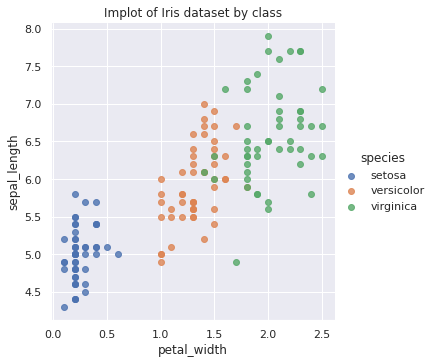

<Figure size 432x288 with 0 Axes>

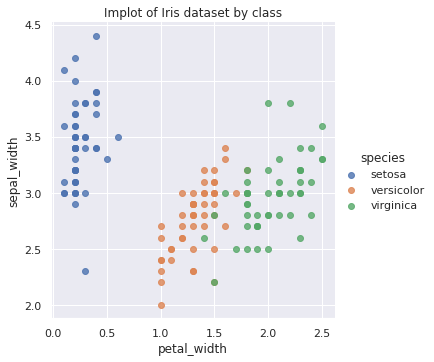

<Figure size 432x288 with 0 Axes>

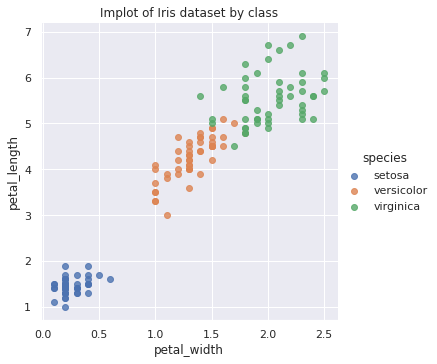

<Figure size 432x288 with 0 Axes>

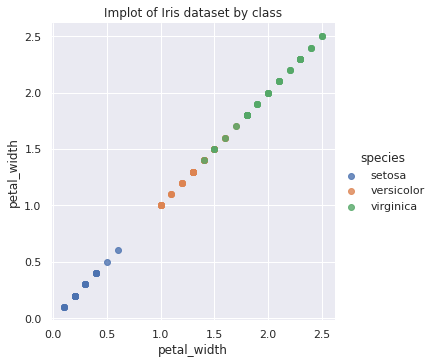

the dataset has 3 classes: ['setosa' 'versicolor' 'virginica']




<Figure size 432x288 with 0 Axes>

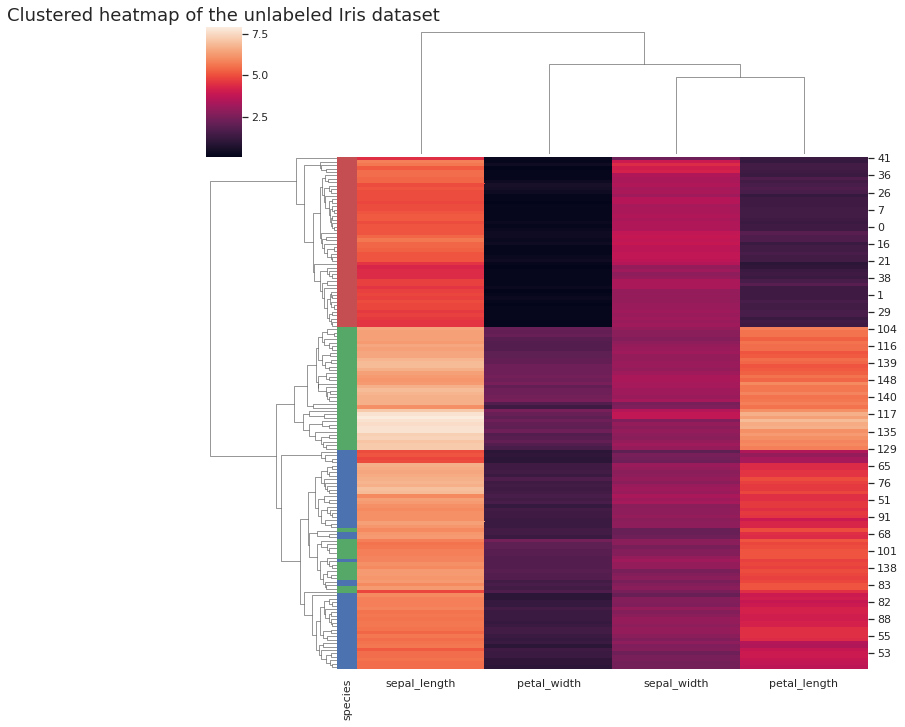

<Figure size 432x288 with 0 Axes>

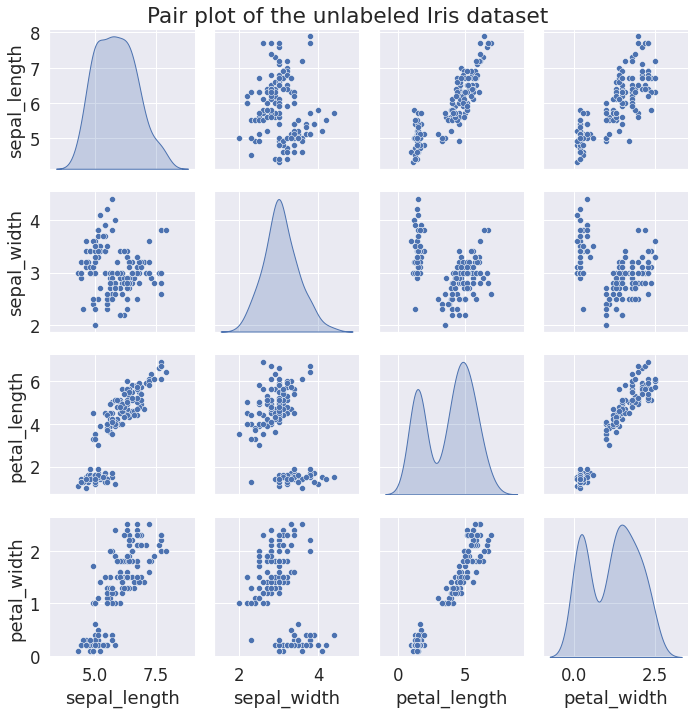

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


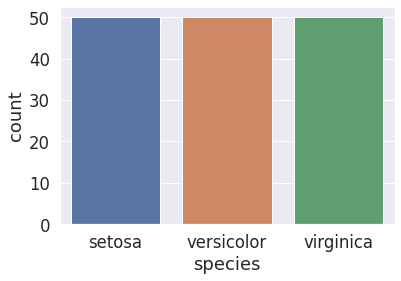

<Figure size 432x288 with 0 Axes>

In [3]:
# initial overview of dataset
print("Dataset info:\n", iris.info(), '\n\n')
print("Dataset describtion:\n", iris.describe(), '\n\n')
print("Dataset first five rows:\n", iris.head(), '\n\n')
print("Dataset null values count:\n", iris.isnull().sum(), '\n\n')

# visualize the correlation with the target -- just to get an idea
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
comboFeatures = list(itertools.product(features, repeat=2))
sns.set(font_scale=1)
for combo in comboFeatures:
    sns.lmplot(x=combo[0], y=combo[1], data=iris, 
            hue="species", height=5, aspect=1, fit_reg=False)
    plt.title("Implot of Iris dataset by class")
    plt.show()
    plt.clf()

# visualize the clustering of the dataset features and target
iris_copy = iris.copy()
species = iris_copy.pop("species")   # drop the target to use the dataset as unlabeled
print(f"the dataset has {len(species.unique().tolist())} classes: {species.unique()}\n\n")
lut = dict(zip(species.unique(), "rbg"))
row_colors = species.map(lut)
g = sns.clustermap(iris_copy, row_colors=row_colors)
sns.set(font_scale=1.5)
plt.title("Clustered heatmap of the unlabeled Iris dataset")
plt.show()
plt.clf()

# visualize the correlation of the features to the target
pp = sns.pairplot(iris_copy, diag_kind='kde')
pp.fig.suptitle("Pair plot of the unlabeled Iris dataset", y=1)
plt.tight_layout()
plt.show()
plt.clf()

# inspect any bias in the dataset
sns.countplot(iris.species)
plt.show()
plt.clf()

### Observation

In [4]:
''' split the dataset '''

X = iris.iloc[:,:-1].values # features on (i.e., unlabeled dataset)
y = iris.iloc[:,-1].values # target values

## Build model

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[[5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


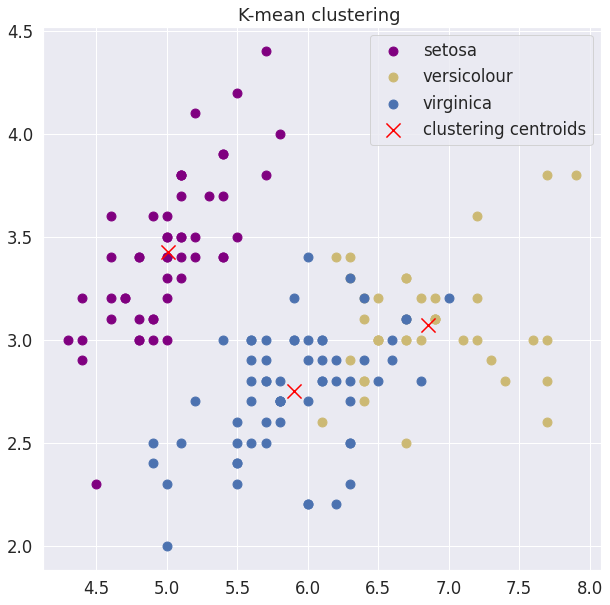

In [5]:
kmeans = KMeans(n_clusters=3, random_state=23)
y_pred = kmeans.fit_predict(X)
print(y_pred)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

plt.figure(figsize=(10,10))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], 
            s=80, color='purple', label='setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], 
            s=80, color='y', label='versicolour')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], 
            s=80, color='b', label='virginica')   #Visualising the clusters - On the first two columns
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1],
            s=200, marker='x', color='red', label='clustering centroids')   #plotting the centroids of the clusters
plt.title("K-mean clustering ")
plt.legend()
plt.show()

In [8]:
''' evaluate model performance using Silhouette Coefficient '''

from sklearn import metrics

silhouette_samples = metrics.silhouette_samples(X, kmeans.labels_)
print(silhouette_samples)

print("Average of Silhouette Coefficients for k =", 3)
print("============================================")
print("Silhouette mean:", silhouette_samples.mean())


[0.85295506 0.81549476 0.8293151  0.80501395 0.8493016  0.74828037
 0.82165093 0.85390505 0.75215011 0.825294   0.80310303 0.83591262
 0.81056389 0.74615046 0.70259371 0.64377156 0.77568391 0.85101831
 0.70685782 0.82030124 0.78418399 0.82590584 0.79297218 0.7941134
 0.77503635 0.79865509 0.83346695 0.84201773 0.84364429 0.81784646
 0.81518962 0.79899235 0.76272528 0.72224615 0.82877171 0.83224831
 0.79415322 0.84188954 0.76856774 0.85033231 0.84941579 0.63900017
 0.78657771 0.80023815 0.74698726 0.80977534 0.81340268 0.81902059
 0.8182324  0.85209835 0.02672203 0.38118643 0.05340075 0.59294381
 0.36885321 0.59221025 0.28232583 0.26525405 0.34419223 0.57829491
 0.37478707 0.58710354 0.55107857 0.48216686 0.56310057 0.32459291
 0.55751057 0.61072967 0.46149897 0.6115753  0.32909528 0.58968904
 0.31046301 0.49424779 0.5000461  0.38548959 0.12629433 0.11798213
 0.55293611 0.5069822  0.59466094 0.5607585  0.61972579 0.26087292
 0.54077013 0.41598629 0.16655431 0.48935747 0.60716023 0.61436

Silhouette Coefficients for k = 2 is 0.6810461692117465
Silhouette Coefficients for k = 3 is 0.5528190123564102
Silhouette Coefficients for k = 4 is 0.49805050499728815
Silhouette Coefficients for k = 5 is 0.48874888709310654
Silhouette Coefficients for k = 6 is 0.36483400396700366
Silhouette Coefficients for k = 7 is 0.35817224727219793
Silhouette Coefficients for k = 8 is 0.3448276330056002
Silhouette Coefficients for k = 9 is 0.3375652296778145
Silhouette Coefficients for k = 10 is 0.30209683941954024
Silhouette Coefficients for k = 11 is 0.2961219167135574
Silhouette Coefficients for k = 12 is 0.3091096992308015
Silhouette Coefficients for k = 13 is 0.2648401041878877
Silhouette Coefficients for k = 14 is 0.2876849784879395
Silhouette Coefficients for k = 15 is 0.3024146377875319
Silhouette Coefficients for k = 16 is 0.2600089401558184
Silhouette Coefficients for k = 17 is 0.26945907971710686
Silhouette Coefficients for k = 18 is 0.2703684401364715
Silhouette Coefficients for k = 1

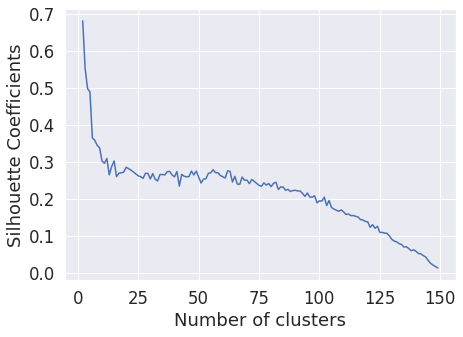

In [12]:
''' finding the optimal K '''

silhouette_avgs = []
min_k = 2

#---try k from 2 to maximum number of labels---
for k in range(min_k, len(X)):
    kmean = KMeans(n_clusters=k, random_state=23).fit(X)
    score = metrics.silhouette_score(X, kmean.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)

# Plot the results as Silhouette Coefficient x number of clusters

f, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(min_k, len(X)), silhouette_avgs)

plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficients")

#---the optimal k is the one with the highest average silhouette---
Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is ", Optimal_K)

# Conclusions
As shown and visialized above, we used the unlabeled Iris dataset to train and test our k-Means model. We started with three clusters (K=3), and calculated the Silhouette Coefficient to be **~0.553**. 

Next, to find the optimal number of clusters for our model, we iteratively built, trained and calculated the Silhouette Coefficient for the same model while varying the K values from 2 up to the number of target datapoints in the dataset (149). We found the model to perform best with this dataset with two clusters (K=2) as it gave the best Silhouette Coefficient of **~0.68**. The plot above shows the change in the Silhouette Coefficient as we varied the number of clusters.

Overall, the algorithim we followed here can be considered the best approach to build, train, validated, and improve a K-Means clustering model. Although, skipping the step where we built the model using the number of classes in the dataset as the value of K, and runing an iterative test directly to find the best K, would have been better approach. This is due to the nature of the K-Means model and the need to define the number of clusters beforehand (K).